# Parsing

# Plotting Forwarding Eval

## Overall Throughput

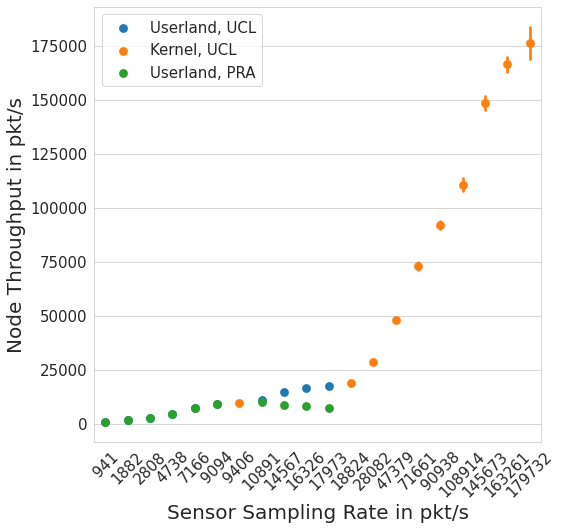

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedFormatter

data_frame_unified_userland = pd.read_pickle('data.pkl')
data_frame_pinging_userland = pd.read_pickle('PingData.pkl')
data_frame_pinging_userland["Config Type"] = "Pinging"

data_frame_unified_kernel = pd.read_pickle('dataKernel.pkl')
data_frame_unified_kernel["Execution Space"] = "Kernel"


frames = [data_frame_unified_userland,data_frame_unified_kernel, data_frame_pinging_userland]

combined = pd.concat(frames)
combined.loc[combined['Config Type'] == "Unified",'Config Type'] = "UCL"
combined.loc[combined['Config Type'] == "Pinging",'Config Type'] = "PRA"
combined['Hue'] = combined["Execution Space"] + ", " +  combined["Config Type"]
combined['Throughput'] = combined['Recieved Data Stream Packets']/60

sns.set_style("whitegrid")
ax = sns.pointplot(data = combined, x='Rate', y="Throughput", hue="Hue", ci="sd" ,join=False)

x_format = ax.xaxis.get_major_formatter()
x_format.seq = ["{:0.0f}".format(float(s)) for s in x_format.seq]
ax.xaxis.set_major_formatter(x_format)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Sensor Sampling Rate in pkt/s", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Node Throughput in pkt/s", fontsize=20)
ax.legend(prop={'size':15})
#ax.set_yscale('log')
#ax.set_xscale('log')
figur = ax.get_figure()
figur.set_size_inches(8, 8)
#figur.savefig("Node_Throughput.svg", bbox_inches='tight')


## Overall Throughput zoomed in

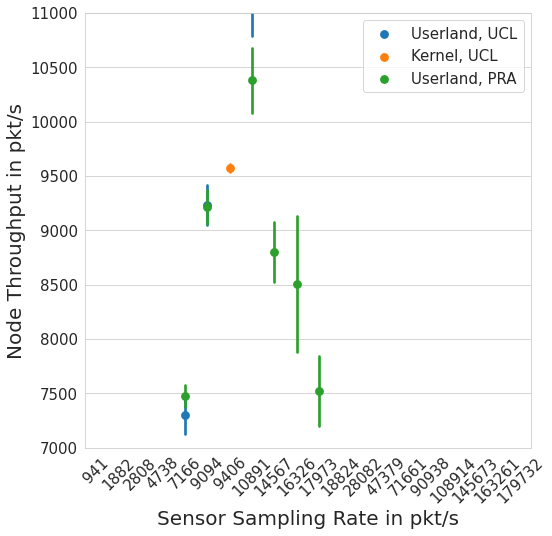

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedFormatter
#plt.figure(figsize=(10, 10))

data_frame_unified_userland = pd.read_pickle('data.pkl')
data_frame_pinging_userland = pd.read_pickle('PingData.pkl')
data_frame_pinging_userland["Config Type"] = "Pinging"

data_frame_unified_kernel = pd.read_pickle('dataKernel.pkl')
data_frame_unified_kernel["Execution Space"] = "Kernel"


frames = [data_frame_unified_userland,data_frame_unified_kernel, data_frame_pinging_userland]

combined = pd.concat(frames)
combined.loc[combined['Config Type'] == "Unified",'Config Type'] = "UCL"
combined.loc[combined['Config Type'] == "Pinging",'Config Type'] = "PRA"
combined['Hue'] = combined["Execution Space"] + ", " +  combined["Config Type"]

#data_frame["Hue"] = data_frame["Execution Space"] + ", " +  data_frame["Config Type"]
#data_frame["Throughput"] = data_frame["Recieved Data Stream Packets"] / data_frame["Time"]

combined['Throughput'] = combined['Recieved Data Stream Packets']/60



sns.set_style("whitegrid")
ax = sns.pointplot(data = combined, x='Rate', y="Throughput", hue="Hue", ci="sd" ,join=False)
ax.set_aspect('auto')
#ax.set_xbound(7000,12000)
ax.set_ylim(7000,11000)
#ax.set_xbound(lower=0.0, upper=18000)
#ax.set_xlim(xmin=2808,xmax=17973)
#ax.margins(-0.5,-0.5)
x_format = ax.xaxis.get_major_formatter()
x_format.seq = ["{:0.0f}".format(float(s)) for s in x_format.seq]
ax.xaxis.set_major_formatter(x_format)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
#ax.xaxis.set_major_locator(plt.MultipleLocator())
ax.set_xlabel("Sensor Sampling Rate in pkt/s", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Node Throughput in pkt/s", fontsize=20)
ax.legend(prop={'size':15})
#ax.set_yscale('log')
#ax.set_xscale('log')
figur = ax.get_figure()
figur.set_size_inches(8, 8)
#figur.savefig("Node_Throughput_zoomedIn.svg", bbox_inches='tight')

#data_frame.head()

## Throughput per Minute

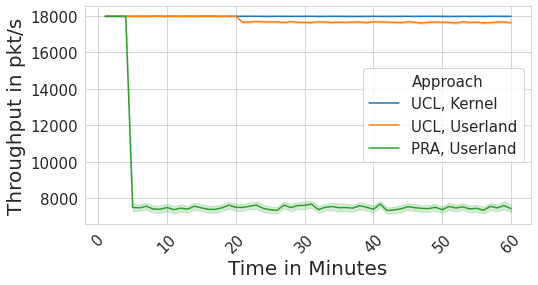

In [3]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
throughput_data = pd.read_pickle('Throughput_PerMinute.pkl')
throughput_data['Approach'] = throughput_data['Config_Type'] + ", " + throughput_data['Execution Space']
ax = sns.lineplot(data = throughput_data, x='Minute', y="Throughput", hue="Approach")
#x = sns.pointplot(data = df, x='Sampling Rate', y="Recall", hue="Ratio interest / data packets", ci="sd" ,join=True)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Time in Minutes", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Throughput in pkt/s", fontsize=20)
ax.legend(prop={'size':15})
#ax.set_yscale('log')
#ax.set_xscale('log')
figur = ax.get_figure()
figur.set_size_inches(8, 4)
#figur.savefig("Throughput_Minute.svg", bbox_inches='tight')

## Throughput per Minute only UCL

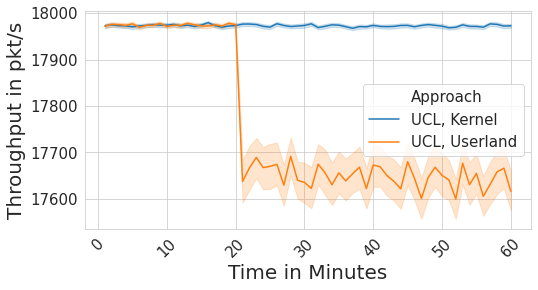

In [4]:
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
throughput_data = pd.read_pickle('Throughput_PerMinute.pkl')
trhoughput_data = throughput_data[throughput_data['Config_Type']=="UCL"]
throughput_data['Approach'] = throughput_data['Config_Type'] + ", " + throughput_data['Execution Space']
ax = sns.lineplot(data = throughput_data[(throughput_data.Config_Type == "UCL")], x='Minute', y="Throughput", hue="Approach")
#x = sns.pointplot(data = df, x='Sampling Rate', y="Recall", hue="Ratio interest / data packets", ci="sd" ,join=True)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Time in Minutes", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Throughput in pkt/s", fontsize=20)
ax.legend(prop={'size':15})
#ax.set_yscale('log')
#ax.set_xscale('log')
figur = ax.get_figure()
figur.set_size_inches(8, 4)
#figur.savefig("Throughput_Minute_UCL.svg", bbox_inches='tight')

# Plotting Precision, Recall, F-Mesaure and Accuracy

## Accuracy

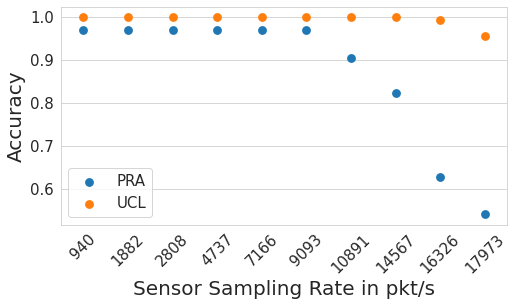

In [5]:
import pandas as pd
import seaborn as sns

df = pd.read_pickle('AccuracyDataFrameUserland.pkl')

sns.set_style("whitegrid")
df.loc[df['Configy Type'] == "Unified",'Config Type'] = "UCL"
df.loc[df['Configy Type'] == "Pinging",'Config Type'] = "PRA"
ax = sns.pointplot(data = df, x='Rate', y="Accuracy", hue='Config Type', ci="sd" ,join=False)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Sensor Sampling Rate in pkt/s", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Accuracy", fontsize=20)
ax.legend(prop={'size':15})
figur = ax.get_figure()
figur.set_size_inches(8, 4)
#figur.savefig("Accuracy_Topology1_Throughput.svg", bbox_inches='tight')

## Precision

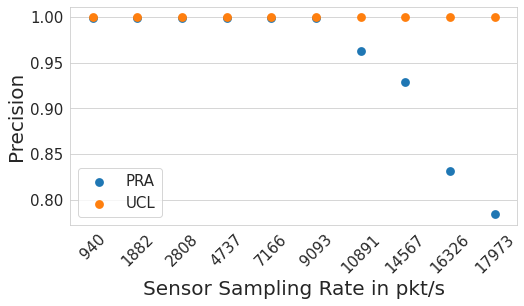

In [6]:
import pandas as pd
import seaborn as sns

df = pd.read_pickle('AccuracyDataFrameUserland.pkl')

sns.set_style("whitegrid")
df.loc[df['Configy Type'] == "Unified",'Config Type'] = "UCL"
df.loc[df['Configy Type'] == "Pinging",'Config Type'] = "PRA"
ax = sns.pointplot(data = df, x='Rate', y="Precision", hue='Config Type', ci="sd" ,join=False)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Sensor Sampling Rate in pkt/s", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Precision", fontsize=20)
ax.legend(prop={'size':15})
figur = ax.get_figure()
figur.set_size_inches(8, 4)
#figur.savefig("Precision_Topology1_Throughput.svg", bbox_inches='tight')

## Recall

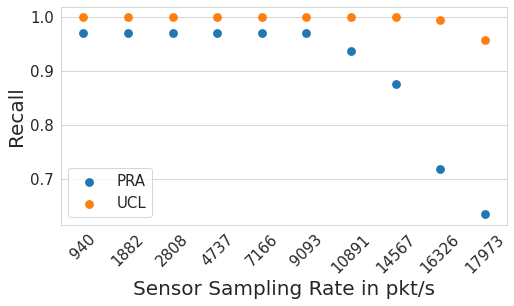

In [7]:
import pandas as pd
import seaborn as sns

df = pd.read_pickle('AccuracyDataFrameUserland.pkl')

sns.set_style("whitegrid")
df.loc[df['Configy Type'] == "Unified",'Config Type'] = "UCL"
df.loc[df['Configy Type'] == "Pinging",'Config Type'] = "PRA"
ax = sns.pointplot(data = df, x='Rate', y="Recall", hue='Config Type', ci="sd" ,join=False)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Sensor Sampling Rate in pkt/s", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("Recall", fontsize=20)
ax.legend(prop={'size':15})
figur = ax.get_figure()
figur.set_size_inches(8, 4)
#figur.savefig("Recall_Topology1_Throughput.svg", bbox_inches='tight')

## F-Score

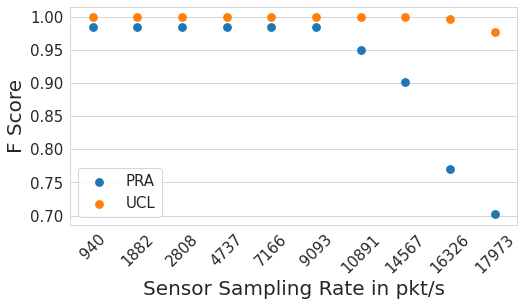

In [8]:
import pandas as pd
import seaborn as sns

df = pd.read_pickle('AccuracyDataFrameUserland.pkl')

sns.set_style("whitegrid")
df.loc[df['Configy Type'] == "Unified",'Config Type'] = "UCL"
df.loc[df['Configy Type'] == "Pinging",'Config Type'] = "PRA"
ax = sns.pointplot(data = df, x='Rate', y="F1 Score", hue='Config Type', ci="sd" ,join=False)
ax.xaxis.set_tick_params(labelsize=15,rotation=45)
ax.set_xlabel("Sensor Sampling Rate in pkt/s", fontsize=20)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("F Score", fontsize=20)
ax.legend(prop={'size':15})
figur = ax.get_figure()
figur.set_size_inches(8, 4)
#figur.savefig("F_Score_Topology1_Throughput.svg", bbox_inches='tight')